In [2]:
library(readxl)
df <- read_excel("../../combined_aro_mic.xlsx")

Warning message in read_xlsx_(path, sheet, col_names = col_names, col_types = col_types, :
“[302, 454]: expecting numeric: got '>32 '”Warning message in read_xlsx_(path, sheet, col_names = col_names, col_types = col_types, :
“[302, 467]: expecting numeric: got '<=32 '”Warning message in read_xlsx_(path, sheet, col_names = col_names, col_types = col_types, :
“[303, 446]: expecting numeric: got '>=32 '”Warning message in read_xlsx_(path, sheet, col_names = col_names, col_types = col_types, :
“[303, 449]: expecting numeric: got '<=4 '”Warning message in read_xlsx_(path, sheet, col_names = col_names, col_types = col_types, :
“[303, 456]: expecting numeric: got '<=1 '”Warning message in read_xlsx_(path, sheet, col_names = col_names, col_types = col_types, :
“[304, 446]: expecting numeric: got '>=32 '”Warning message in read_xlsx_(path, sheet, col_names = col_names, col_types = col_types, :
“[304, 449]: expecting numeric: got '<=4 '”Warning message in read_xlsx_(path, sheet, col_names = col_

In [7]:
df[,c('cefazolin_ris')][1:10]
df[,c('imipenem_ris')][1:10]
#?????

[1] NA NA NA NA NA NA NA NA NA NA

[1] NA  NA  NA  NA  NA  NA  NA  NA  "S" "R"

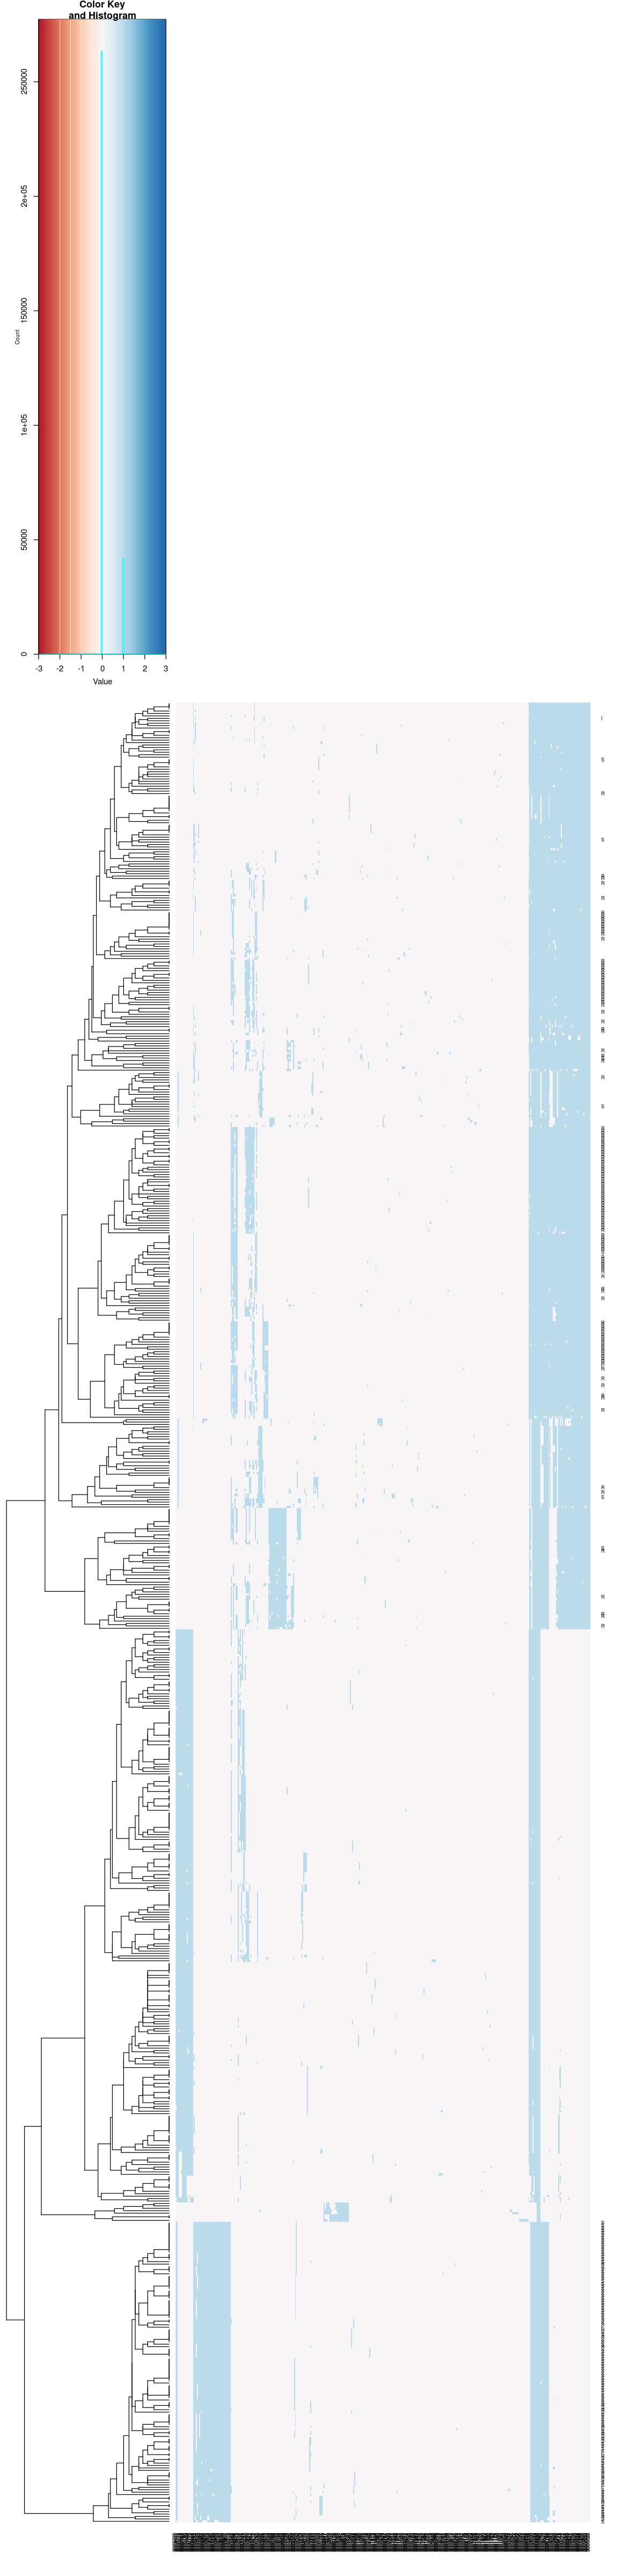

In [12]:
start_aro = grep("3000010", colnames(df))
end_aro = grep("3004045", colnames(df))

# turn to matrix
ma <- data.matrix(df[,start_aro:end_aro])

# draw
library(gplots)
library(RColorBrewer)

options(repr.plot.width=10, repr.plot.height=40)

hmcol = colorRampPalette(brewer.pal(9, "RdBu"))(100)
hmap <- heatmap.2(ma, labRow =df[,c('imipenem_ris')], dendrogram = "row", Rowv = TRUE, Colv = TRUE, scale="none", trace = "none", col = hmcol, breaks = seq(-3, 3, length.out = 101))



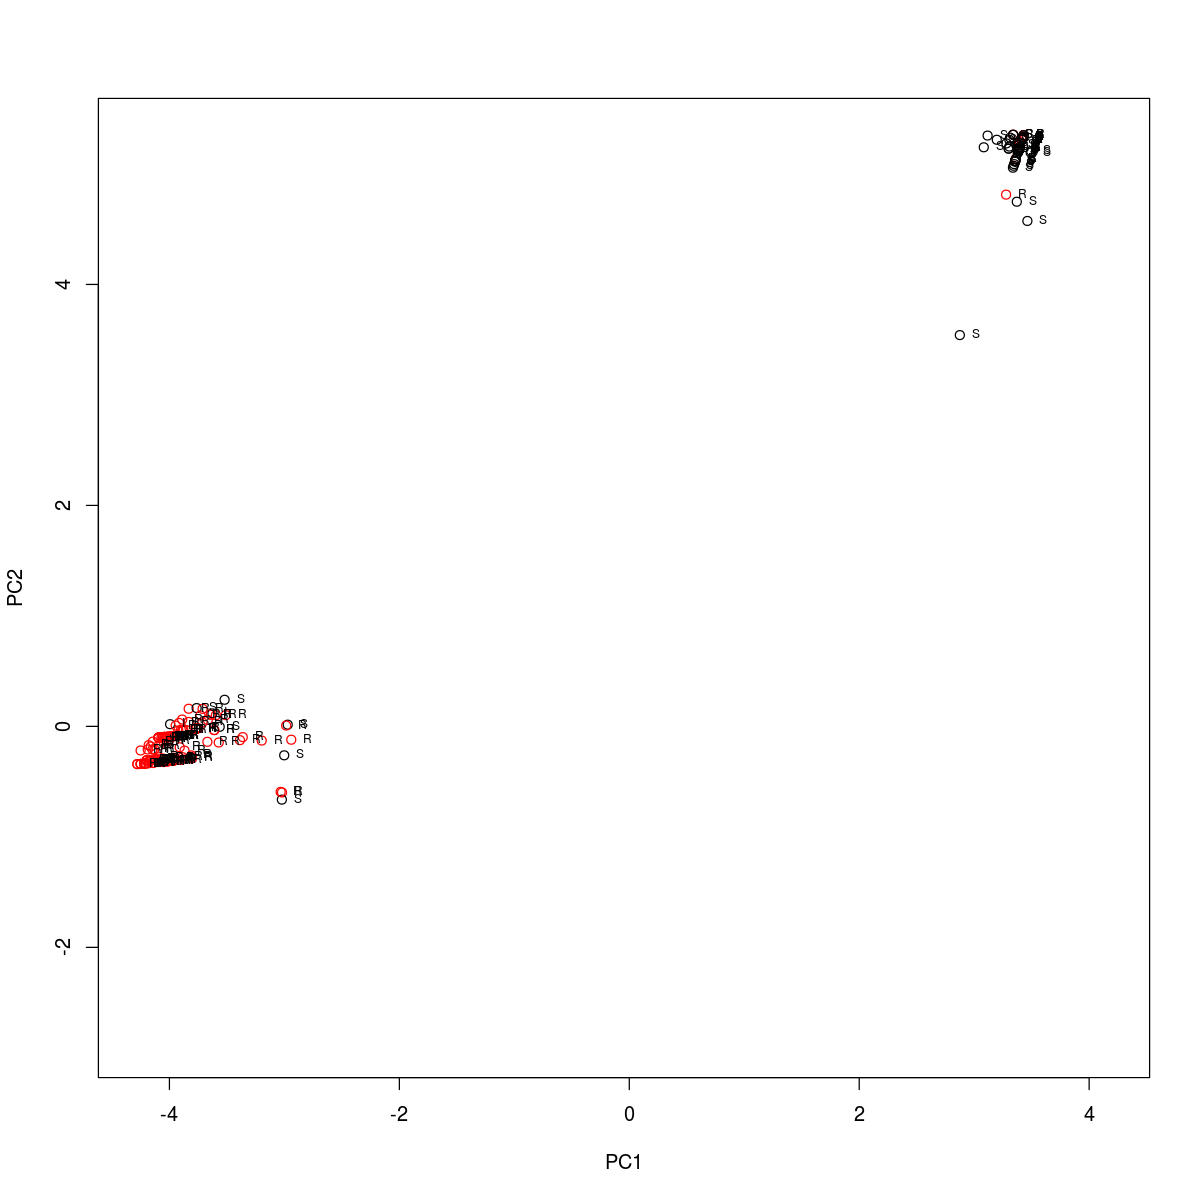

In [17]:
options(repr.plot.width=10, repr.plot.height=10)
PCA <- prcomp(ma)
plot(PCA$x[,1:2], col = ifelse(df[,c('imipenem_ris')] == 'R', "red", "black"))
text(PCA$x[,1], PCA$x[,2], df[,c('imipenem_ris')], cex=0.6, pos=4)

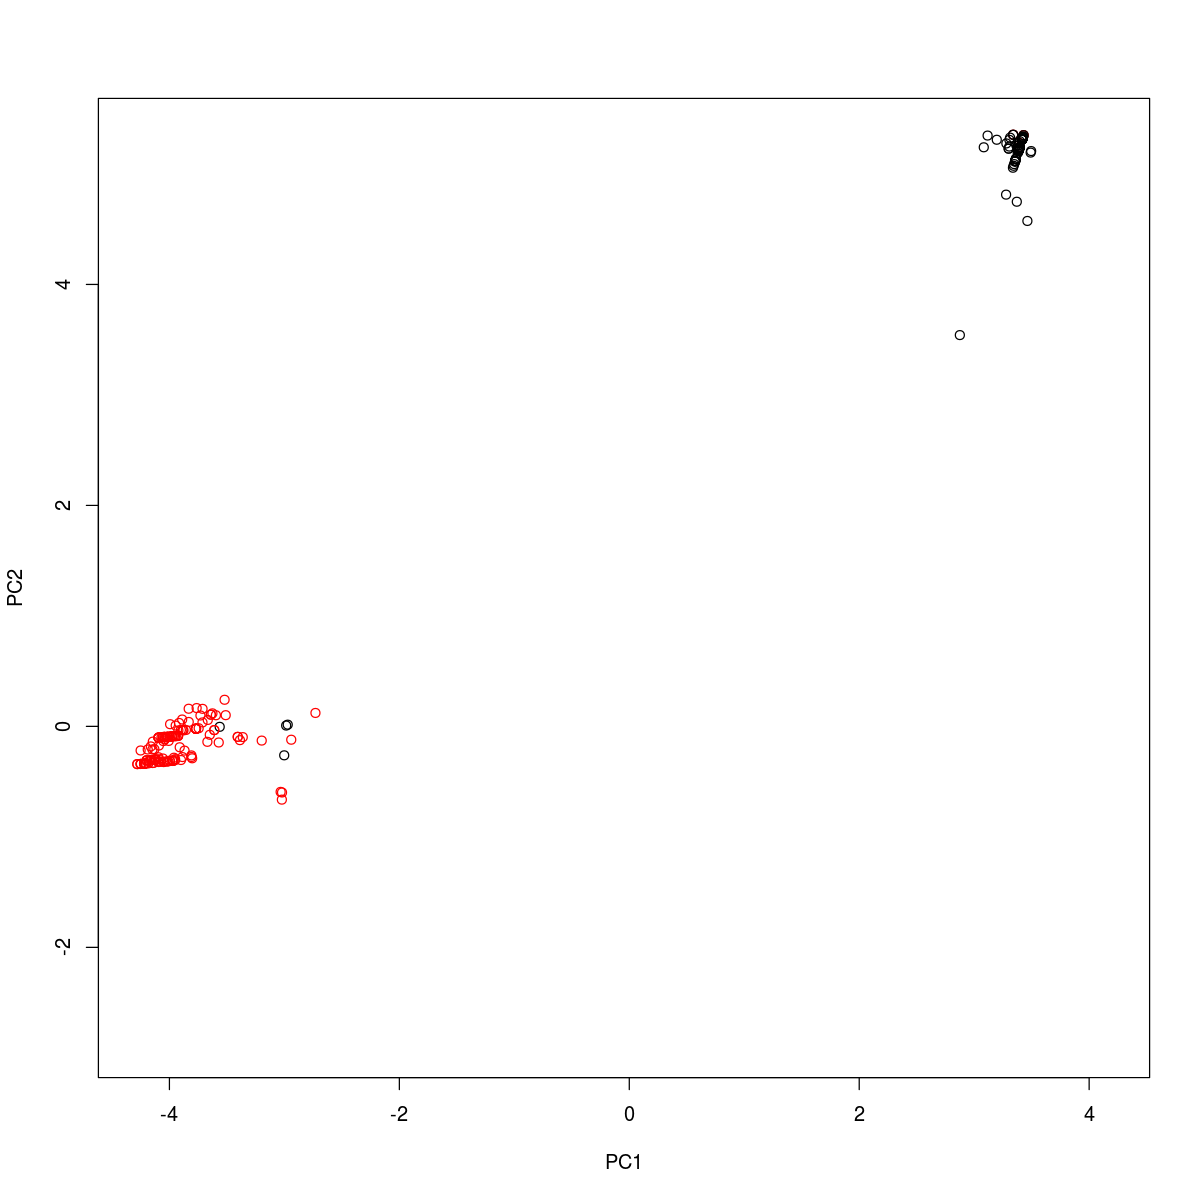

In [19]:
options(repr.plot.width=10, repr.plot.height=10)
PCA <- prcomp(ma)
plot(PCA$x[,1:2], col = ifelse(df[,c('ceftazidime_ris')] == 'R', "red", "black"))


In [22]:
ec <- read_excel("../../EcoliGenomes/ec_card.xlsx")
ec[,1]

In [27]:
ec_subset = df[df$ID %in% ec[,1],]

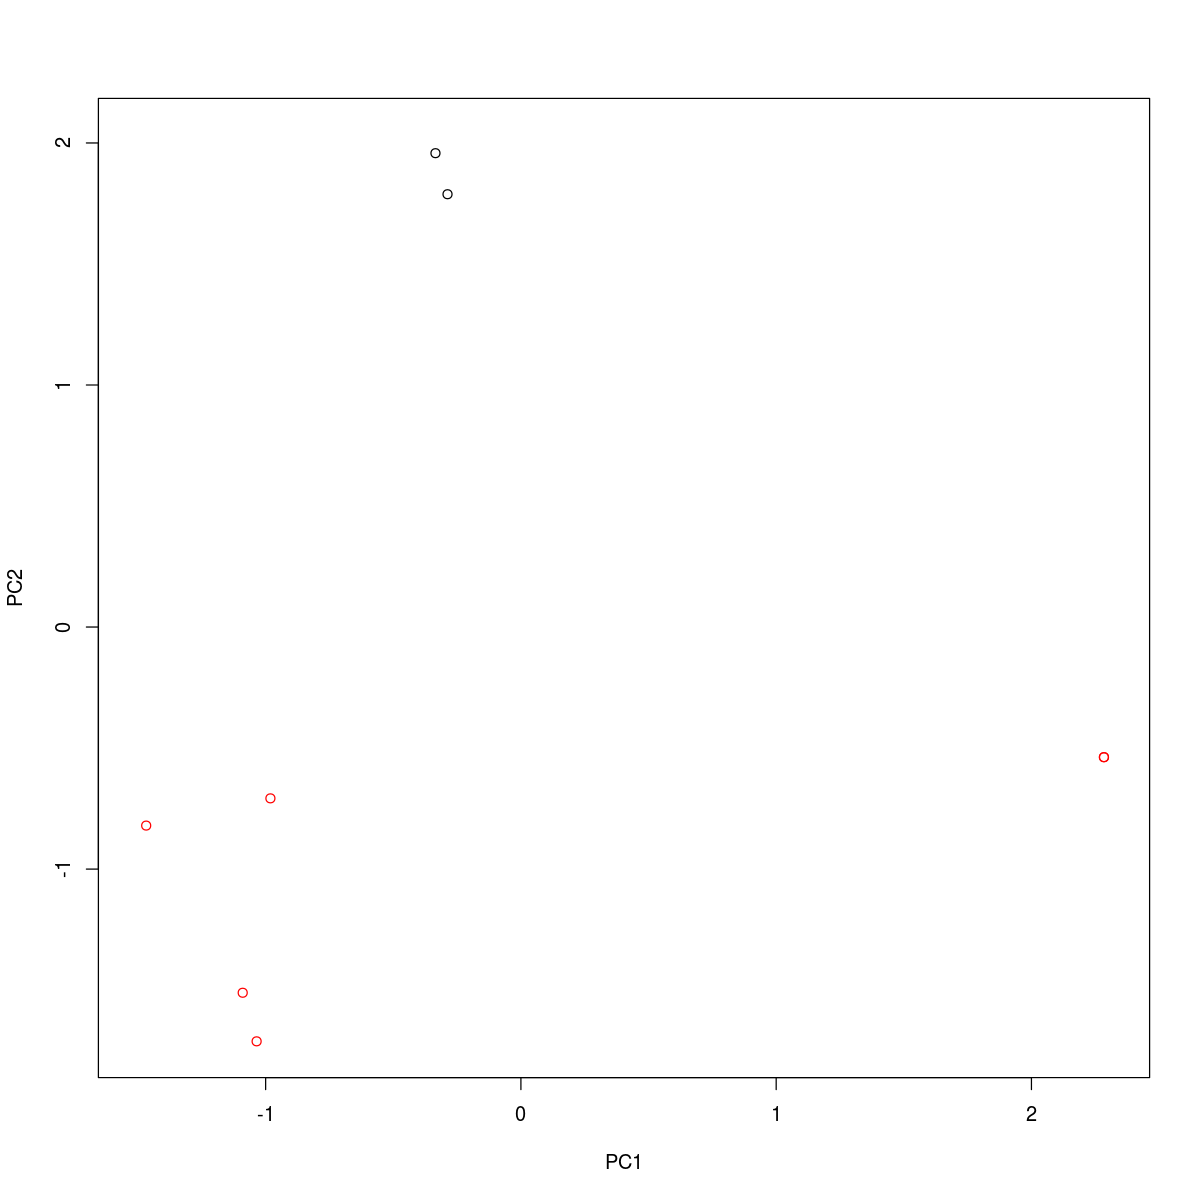

In [30]:
ec_ma = data.matrix((ec_subset[,start_aro:end_aro]))
options(repr.plot.width=10, repr.plot.height=10)
PCA <- prcomp(ec_ma)
plot(PCA$x[,1:2], col = ifelse(ec_subset[,c('ceftazidime_ris')] == 'R', "red", "black"))

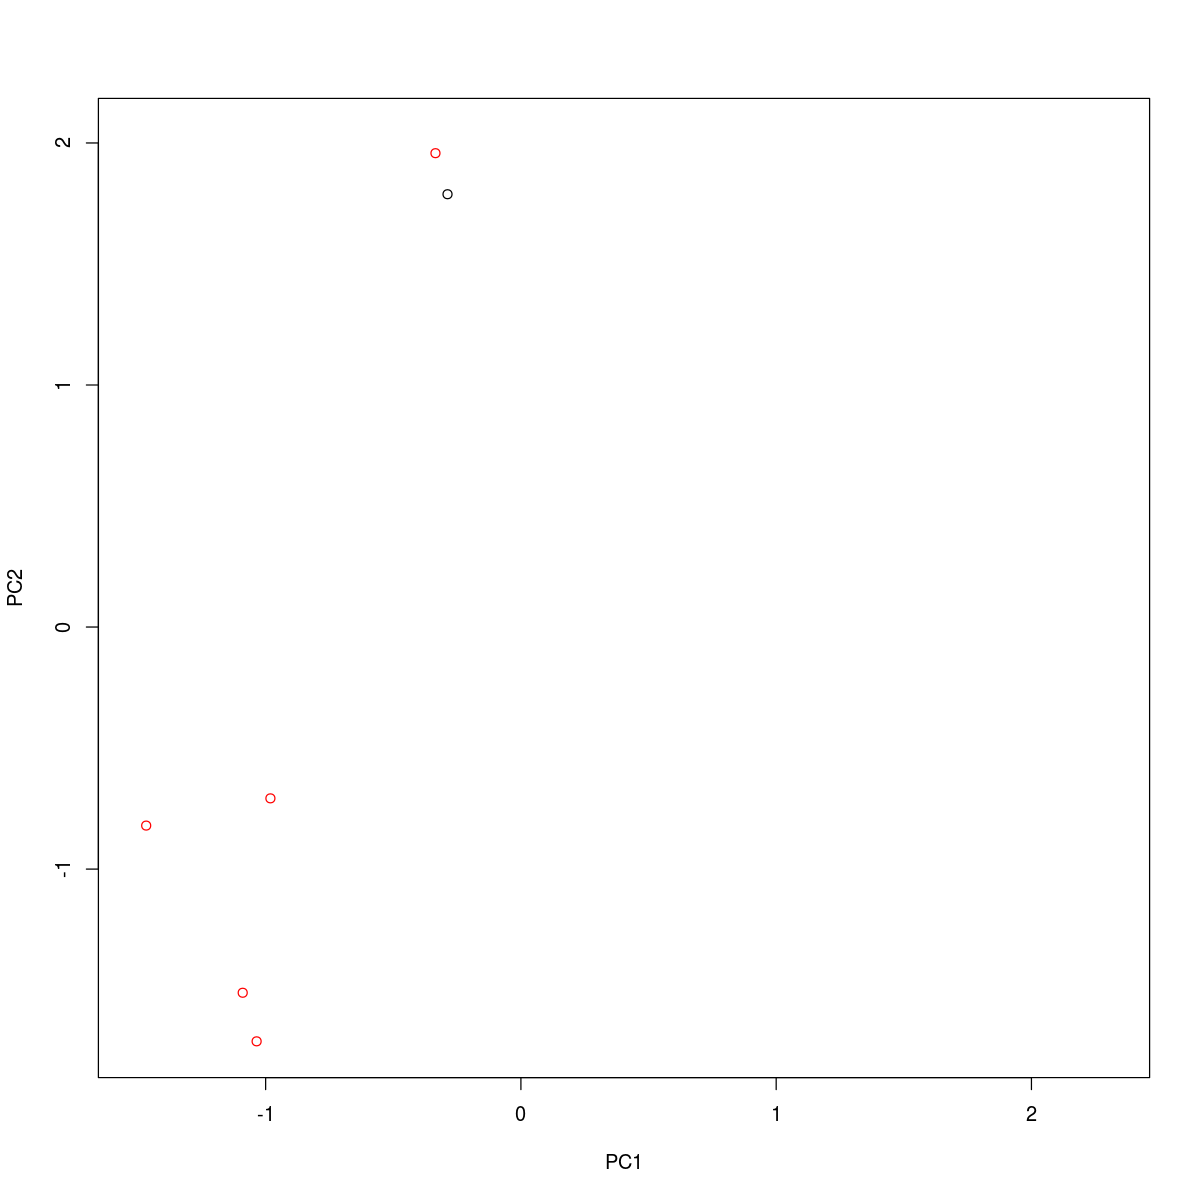

In [33]:
plot(PCA$x[,1:2], col = ifelse(ec_subset[,c('imipenem_ris')] == 'R', "red", "black"))